In [1]:
import librosa
import numpy as np
from scipy.stats import spearmanr
import matplotlib.pyplot as plt

## Load samples using librosa

In [2]:
y1, sr1 = librosa.load("knock_sounds/test_knock1.mp3")

/Users/a1exandr0/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


In [3]:
y2, sr2 = librosa.load("knock_sounds/test_kcock3.mp3")

/Users/a1exandr0/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


## Plot samples

In [4]:
from librosa.display import waveplot

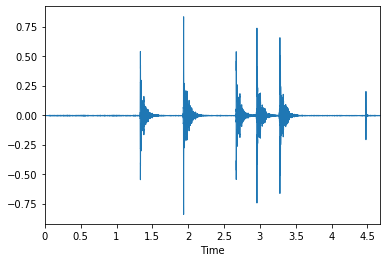

In [5]:
waveplot(y1)

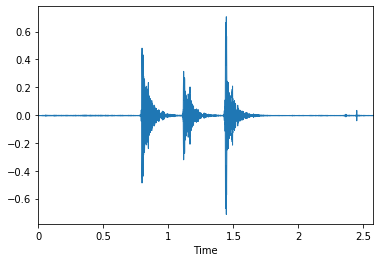

In [6]:
waveplot(y2)

## Applied FFT and cheked using speerman korrelation

In [7]:
a1 = np.fft.fft(y1)

In [8]:
a1.shape

(103008,)

In [9]:
a2 = np.fft.fft(y2)

In [10]:
a2.shape

(56832,)

/Users/a1exandr0/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:844: ComplexWarning: Casting complex values to real discards the imaginary part
  indices = f_indices.astype(np.intp)
/Users/a1exandr0/opt/anaconda3/lib/python3.7/site-packages/matplotlib/transforms.py:796: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.array(args, dtype=float).reshape(2, 2)
/Users/a1exandr0/opt/anaconda3/lib/python3.7/site-packages/matplotlib/transforms.py:1959: ComplexWarning: Casting complex values to real discards the imaginary part
  x, y = float(x), float(y)


(array([8.000e+00, 2.700e+01, 1.420e+02, 1.068e+03, 9.948e+04, 1.990e+03,
        2.550e+02, 3.200e+01, 4.000e+00, 2.000e+00]),
 array([-143.97784 -105.82895j , -112.79661  -84.58039j ,
         -81.61537  -63.33184j ,  -50.43414  -42.083282j,
         -19.252905 -20.834728j,   11.928329  +0.413826j,
          43.109566 +21.66238j ,   74.2908   +42.910934j,
         105.47203  +64.15949j ,  136.65327  +85.40804j ,
         167.8345  +106.6566j  ], dtype=complex64),
 <a list of 10 Patch objects>)

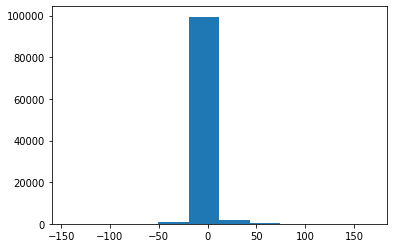

In [11]:
plt.hist(a1)

(array([6.0000e+00, 8.0000e+00, 4.6000e+01, 3.4400e+02, 5.4858e+04,
        1.3800e+03, 1.6000e+02, 1.8000e+01, 1.0000e+01, 2.0000e+00]),
 array([-152.48776  -67.60065j  , -120.59507  -60.463245j ,
         -88.70238  -53.32584j  ,  -56.809685 -46.18844j  ,
         -24.916992 -39.051037j ,    6.9757004-31.913633j ,
          38.868393 -24.776232j ,   70.761086 -17.638828j ,
         102.65378  -10.501426j ,  134.54648   -3.3640232j,
         166.43916   +3.7733793j], dtype=complex64),
 <a list of 10 Patch objects>)

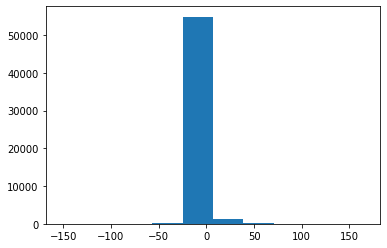

In [12]:
plt.hist(a2)

In [13]:
spearmanr(a1[0:min(len(y1), len(y2))], a2[0:min(len(y1), len(y2))])

SpearmanrResult(correlation=-0.0017253153806425566, pvalue=0.6808546351841607)

## PCA, UMAP, TSNE on sound samples

In [14]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap

In [15]:
mfcc1 = librosa.feature.mfcc(y1[0:min(len(y1), len(y2))])
mfcc2 = librosa.feature.mfcc(y2[0:min(len(y1), len(y2))])

In [16]:
mfccs = np.concatenate((mfcc1, mfcc2), axis=0)

In [17]:
mfccs.shape

(40, 112)

In [18]:
labels = np.concatenate((np.zeros(20), np.ones(20)), axis=0)

In [19]:
tsne = TSNE(2, verbose=True)
projected = tsne.fit_transform(mfccs, labels)

[t-SNE] Computing 39 nearest neighbors...
[t-SNE] Indexed 40 samples in 0.000s...
[t-SNE] Computed neighbors for 40 samples in 0.013s...
[t-SNE] Computed conditional probabilities for sample 40 / 40
[t-SNE] Mean sigma: 48.397869
[t-SNE] KL divergence after 250 iterations with early exaggeration: 47.370457
[t-SNE] KL divergence after 1000 iterations: 0.394747


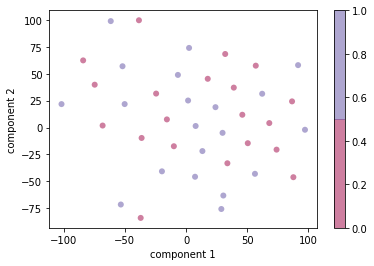

In [20]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=labels, edgecolor='none', cmap=plt.cm.get_cmap('Spectral', 2), alpha=.5)

plt.xlabel("component 1")
plt.ylabel("component 2")

plt.colorbar()
plt.show()

## Male/Female voice clustering

In [21]:
male1, sr1 = librosa.load("egor.mp3")
male2, sr2 = librosa.load("oleg.mp3")
male3, sr3 = librosa.load("misha.mp3")
female1, sr4 = librosa.load("nst1.mp3")
female2, sr5 = librosa.load("nst2.mp3")
female3, sr6 = librosa.load("nst3.mp3")


/Users/a1exandr0/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/Users/a1exandr0/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/Users/a1exandr0/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/Users/a1exandr0/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/Users/a1exandr0/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn

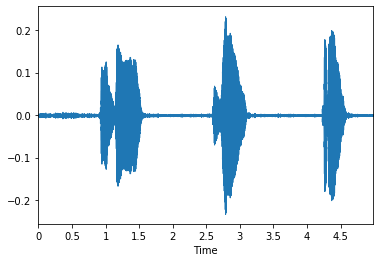

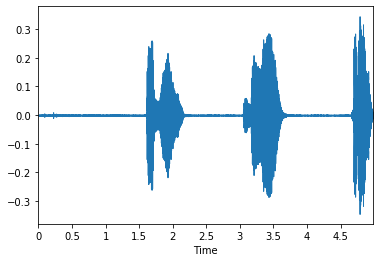

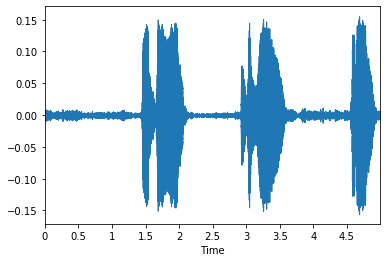

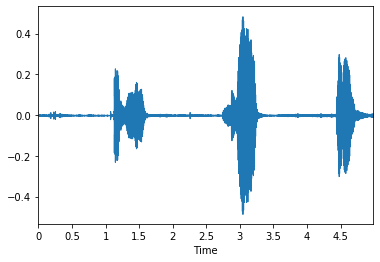

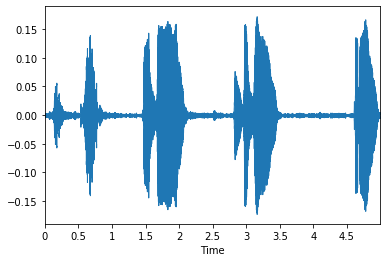

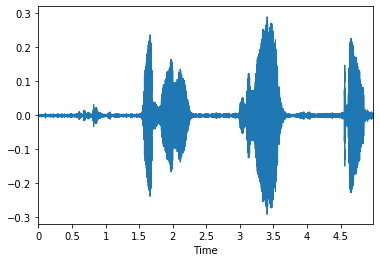

In [40]:
sounds = [female1, male1, female2, male2, female3, male3]
feats = []
for i in sounds:
    waveplot(i[:110000])
    plt.show()
    feats.append(librosa.feature.mfcc(i[:110000]))

In [45]:
np.array(feats).shape

(120, 215)

In [44]:
feats = np.concatenate(feats, axis=0)

In [47]:
labels = []

In [48]:
for i in range(3):
    for j in range(20):
        labels.append(0)
    for j in range(20):
        labels.append(1)

### 2D TSNE

In [59]:
tsne = TSNE(2, verbose=True)
projected = tsne.fit_transform(feats, labels)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 120 samples in 0.002s...
[t-SNE] Computed neighbors for 120 samples in 0.005s...
[t-SNE] Computed conditional probabilities for sample 120 / 120
[t-SNE] Mean sigma: 79.939449
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.077976
[t-SNE] KL divergence after 1000 iterations: 0.414950


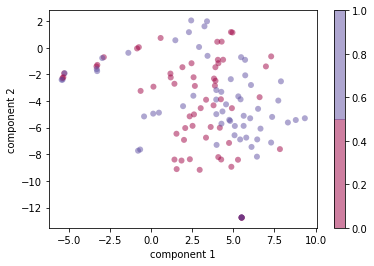

In [60]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=labels, edgecolor='none', cmap=plt.cm.get_cmap('Spectral', 2), alpha=.5)

plt.xlabel("component 1")
plt.ylabel("component 2")

plt.colorbar()
plt.show()

In [61]:
type(projected)

numpy.ndarray

### 2D PCA

In [62]:
pca = PCA(2)
projected2 = pca.fit_transform(feats, labels)

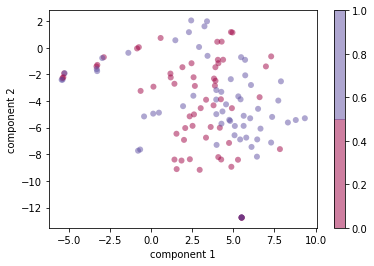

In [63]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=labels, edgecolor='none', cmap=plt.cm.get_cmap('Spectral', 2), alpha=.5)

plt.xlabel("component 1")
plt.ylabel("component 2")

plt.colorbar()
plt.show()

In [65]:
pca = PCA(3)
projected3 = pca.fit_transform(feats, labels)

In [66]:
from mpl_toolkits.mplot3d import Axes3D
projected3.shape

(120, 3)

### 3D PCA

<IPython.core.display.Javascript object>


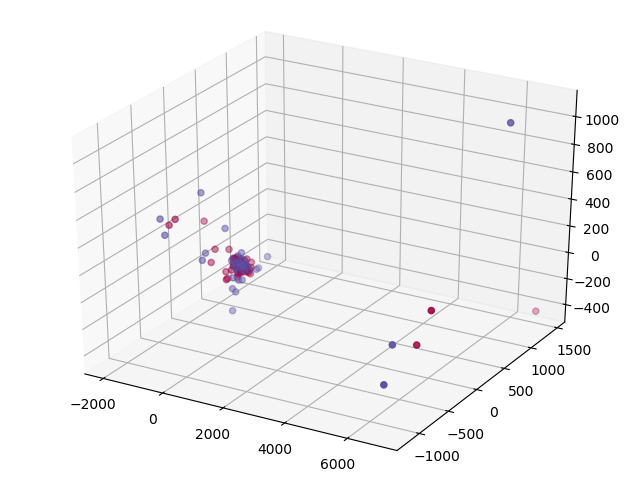

In [81]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(projected3[:, 0], projected3[:, 1], projected3[:, 2], c=labels, cmap=plt.cm.get_cmap('Spectral', 10))


### 3D TSNE

In [75]:
ts = TSNE(3)
projected4 = ts.fit_transform(feats, labels)

<IPython.core.display.Javascript object>


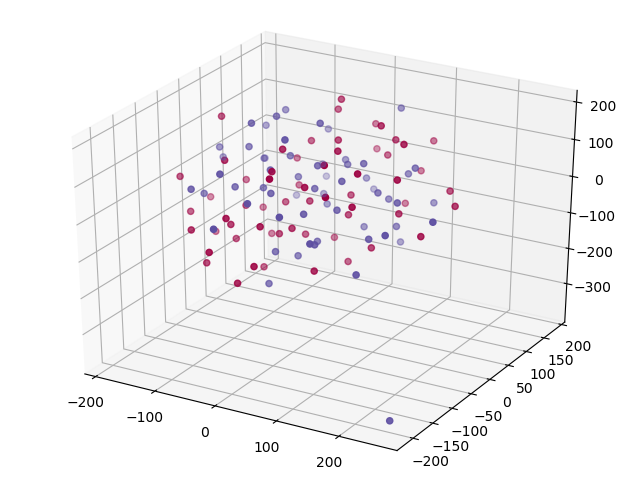

In [80]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(projected4[:, 0], projected4[:, 1], projected4[:, 2], c=labels, cmap=plt.cm.get_cmap('Spectral', 10))



## Mpi4Py Helloworld

In [6]:
from mpi4py import MPI
import sys

comm = MPI.COMM_WORLD
rank = comm.Get_rank()
size = comm.Get_size()

print("Hello World from rank {} of {}".format(rank,size))

sys.exit()

Hello World from rank 0 of 1


SystemExit: 

/Users/a1exandr0/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3334: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
